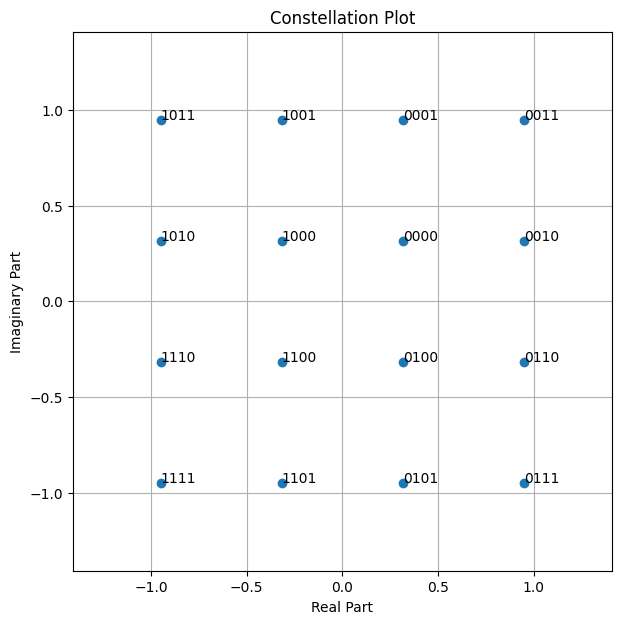

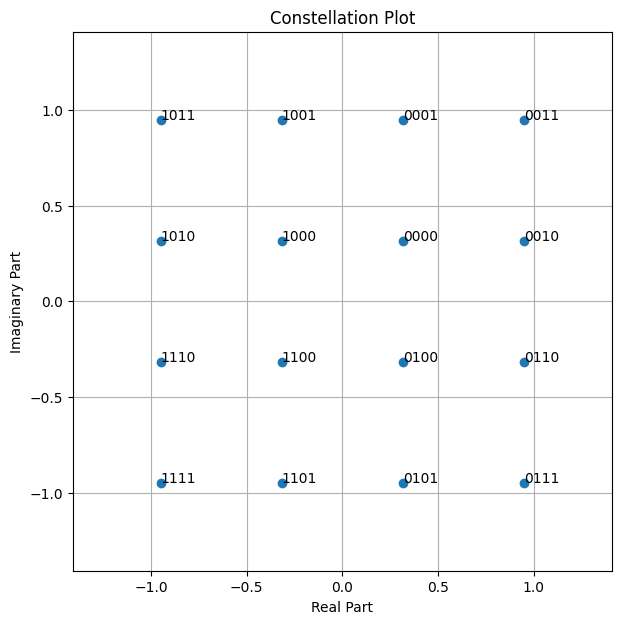

In [6]:
import os
if os.getenv("CUDA_VISIBLE_DEVICES") is None:
    gpu_num = 0 # Use "" to use the CPU
    os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import sionna.phy
import matplotlib.pyplot as plt
import numpy as np

batch_size = 1000
Bits = 4
binary_source = sionna.phy.mapping.BinarySource()
b = binary_source([batch_size, Bits])
constellation = sionna.phy.mapping.Constellation("qam",Bits)
constellation.show()

In [7]:
mapper = sionna.phy.mapping.Mapper(constellation=constellation)
x = mapper(b)

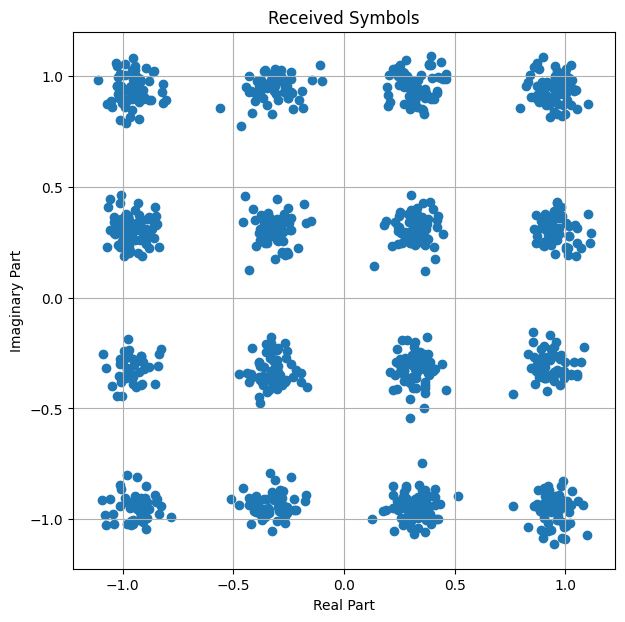

In [8]:
awgn = sionna.phy.channel.AWGN()
ebno_db = 15
no = sionna.phy.utils.ebnodb2no(ebno_db, Bits, coderate=1)
y= awgn(x,no)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.scatter(np.real(y), np.imag(y));
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True, which="both", axis="both")
plt.title("Received Symbols");

In [9]:
!nvidia-smi

Thu Jun 12 02:10:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A1000 6GB Lap...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              4W /   35W |    4276MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----